In [12]:
import pandas as pd
df = pd.read_csv("/Users/Lusa1/Downloads/20FALL/interview/AngelList/cata/match1.csv")
df.head()

,skills,job_title
0,"Alloy, AngularJS, C#, Django, Docker / Docker ...",Fullstack Engineer
1,"abaqus, Aerospace, Ansys, Ansys Fluent, Automa...",Consultant
2,"3D Modeling, Assembly Language, C#, Eclipse, F...",Fullstack Engineer
3,"Business Operations, Business Strategy, Compet...",Consultant
4,"CSS3, HTML, Information Technology, Javascript...",Consultant


In [13]:
from io import StringIO

df['category_id'] = df['job_title'].factorize()[0]
category_id_df = df[['job_title', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'job_title']].values)
df.head()

,skills,job_title,category_id
0,"Alloy, AngularJS, C#, Django, Docker / Docker ...",Fullstack Engineer,0
1,"abaqus, Aerospace, Ansys, Ansys Fluent, Automa...",Consultant,1
2,"3D Modeling, Assembly Language, C#, Eclipse, F...",Fullstack Engineer,0
3,"Business Operations, Business Strategy, Compet...",Consultant,1
4,"CSS3, HTML, Information Technology, Javascript...",Consultant,1


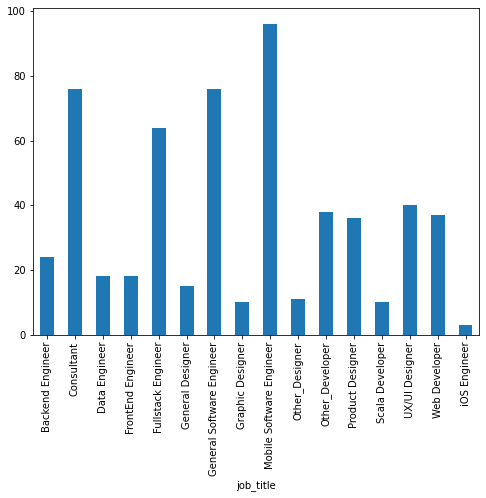

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('job_title').skills	.count().plot.bar(ylim=0)
plt.show()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df['skills'].values.astype('U')).toarray()
labels = df.category
features.shape

(590, 1065)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['skills'], df['job_title'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.values.astype('U'))
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [23]:
print(clf.predict(count_vect.transform(["Agile, Android, Application Architecture, Application Development, Automation, C++, Concurrent Programming, Documentation, Git, Github, Help Desk, Infrastructure, iOS Development, Java, Microsoft Windows, Object Oriented Programming, Objective-C, Quality Assurance, Scheduling, Software, Software Architecture, Software Design, Swift, Test, Test Cases, User Interface, XML"])))

['Mobile Software Engineer']


In [25]:
df[df['skills'] == "Agile, Android, Application Architecture, Application Development, Automation, C++, Concurrent Programming, Documentation, Git, Github, Help Desk, Infrastructure, iOS Development, Java, Microsoft Windows, Object Oriented Programming, Objective-C, Quality Assurance, Scheduling, Software, Software Architecture, Software Design, Swift, Test, Test Cases, User Interface, XML"]

,skills,job_title,category_id
99,"Agile, Android, Application Architecture, Appl...",Mobile Software Engineer,2


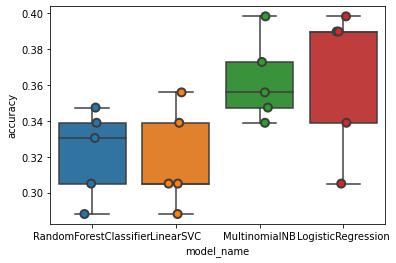

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [28]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.318644
LogisticRegression        0.364407
MultinomialNB             0.362712
RandomForestClassifier    0.322034
Name: accuracy, dtype: float64